In [1]:
import pandas as pd
import numpy as np
import sqlalchemy

# Create a temporary sqlite database
database_connection_string = 'sqlite:///'

# Create an engine to interact with the database
engine = sqlalchemy.create_engine(database_connection_string)


In [2]:
stocks_dataframe = pd.DataFrame({'AAPL': [1, 2, 3], 'GOOG': [4, 5, 6]})
stocks_dataframe.to_sql('stocks', engine)
engine.table_names()


/Users/michaeldionne/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  This is separate from the ipykernel package so we can avoid doing imports until


['stocks']

In [3]:
query = """
SELECT "AAPL" FROM stocks;
"""

results = engine.execute(query)
list(results)


[(1,), (2,), (3,)]

<AxesSubplot:>

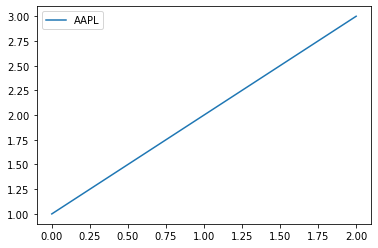

In [4]:
df = pd.read_sql_query(query, con=engine)
df.plot()


In [5]:
query = """
SELECT AAPL FROM stocks
WHERE AAPL < 3;
"""
apple_df = pd.read_sql_query(query, con=engine)
apple_df


,AAPL
0,1
1,2


In [6]:
query = """
SELECT AAPL FROM stocks
WHERE AAPL = 1 OR AAPL = 3;
"""
df = pd.read_sql_query(query, con=engine)
df


,AAPL
0,1
1,3


In [8]:
#7.2.5 Limiting and ordering data
# Set the random seed so we all get the same random data
np.random.seed(0)
stocks_dataframe = pd.DataFrame(
    np.random.randint(0, 100, size=(10, 2)),
    columns=["AAPL", "GOOG"]
)

# To view the data, use either the iloc function or the head function.
display(stocks_dataframe.iloc[:3])
display(stocks_dataframe.head(3))


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


In [9]:
stocks_dataframe.to_sql('stocks', engine, index=False, if_exists='replace')
query = """
SELECT *
FROM stocks
LIMIT 3;
"""

limit_df = pd.read_sql_query(query, con=engine)
limit_df


,AAPL,GOOG
0,44,47
1,64,67
2,67,9


In [10]:
query = """
SELECT * FROM stocks
WHERE AAPL < 50
LIMIT 3;
"""

where_limit_df = pd.read_sql_query(query, con=engine)
where_limit_df


,AAPL,GOOG
0,44,47
1,36,87
2,39,87


In [ ]:
query = """
SELECT * FROM stocks
WHERE AAPL < 50
ORDER BY AAPL DESC
LIMIT 3;
"""

orderby_df = pd.read_sql_query(query, con=engine)
orderby_df
